# Coursework 1 - Articial Intelligence and Machine Learning
# Student Name: Antony Lockhart 
# Student Email: alockh300@caledonian.ac.uk

I confirm that the material contained within the submitted coursework is all my own work unless otherwise stated below.

---


# Problem Definition

From the dataset provided we have been given data regarding bike rental usage across the year. 
From this data we are attempting to forecast the expected bike rental demands based on environmental and seasonal variables,  
This data will allow us to predict the answer to the question, "when is there likely to be increased demand for bike rentals?"

# Data Ingestion

Before we can work with the data, the required libraries are required to be imported into the notebook for usage. These libraries are installed in the conda environment to ensure this will work without issues. The only non standard library used is DataPred.eda which is used to provide a quick report on the data. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from scipy.stats import boxcox
from dataprep.eda import *
from dataprep.eda import plot
from dataprep.eda import plot_correlation
from dataprep.eda import plot_missing
from sklearn import metrics
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical, normalize
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix  
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score
import warnings
warnings.filterwarnings("ignore")
gpus = tf.config.list_physical_devices('GPU')
if gpus:
  try:
    # Currently, memory growth needs to be the same across GPUs
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
    print(e)
tf.debugging.set_log_device_placement(True)
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
print("Num CPUs Available: ", len(tf.config.list_physical_devices('CPU')))
print(tf.config.list_physical_devices())


2022-11-14 11:16:16.210548: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


1 Physical GPUs, 1 Logical GPUs
Num GPUs Available:  1
Num CPUs Available:  1
[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


2022-11-14 11:16:18.940069: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-11-14 11:16:18.940807: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2022-11-14 11:16:18.953305: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-14 11:16:18.953437: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:0c:00.0 name: NVIDIA GeForce RTX 3090 computeCapability: 8.6
coreClock: 1.695GHz coreCount: 82 deviceMemorySize: 23.70GiB deviceMemoryBandwidth: 871.81GiB/s
2022-11-14 11:16:18.953453: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2022-11-14 11:16:18.989358: I tensorflow/stream_executor/platform/d

# Load data using pandas

Once we have the libraries loaded, the next step is to load the dataset and have a quick look at some of the colums to have an example of the data in these fields.

In [26]:
#load data
df = pd.read_csv('/home/antony/Documents/AIML#/CW1/bike-dataset/bike-dataset/bike-dataset hour.csv')
features = df.columns
# print(features)
print(df.head(10))
# print(df.describe())

   instant      dteday  season  yr  mnth  hr  holiday  weekday workingday  \
0        1  2011-01-01       1   0     1   0        0        6         No   
1        2  2011-01-01       1   0     1   1        0        6         No   
2        3  2011-01-01       1   0     1   2        0        6         No   
3        4  2011-01-01       1   0     1   3        0        6         No   
4        5  2011-01-01       1   0     1   4        0        6         No   
5        6  2011-01-01       1   0     1   5        0        6         No   
6        7  2011-01-01       1   0     1   6        0        6         No   
7        8  2011-01-01       1   0     1   7        0        6         No   
8        9  2011-01-01       1   0     1   8        0        6         No   
9       10  2011-01-01       1   0     1   9        0        6         No   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81     0.0000       3          13   16  
1       

# DataPrep.eda
Using the dataprep plugin, we can create a report to analyse the data, this report is saved to a html file for ease of access. 

In [4]:
from dataprep.eda import create_report
report = create_report(df)

report.save('report.html')

  0%|          | 0/2618 [00:00<?, ?it/s]

Report has been saved to report.html!


With the data loaded, and checked we can identify the data types, and find our target variable for the model to predict. 

# Target Variable
The target variable for this model would be the cnt column as this relates to the number of bikes which are hired per hour.

# Data Preparation

In order to work witht he data we must do the following 
1. Check for duplicate data
2. Remove some superfluos columns
3. Fill in missing values in the temp and atemp columns
4. Create a new field that indicates if it is peak time or not
5. Create a new field that indicates if it is night or not
6. Encode the data in a suitable format



# 1. Check for duplicated data

To ensure all of the data in the dataset is unique, we will run a check for duplicate colums. If any are found these will be removed to aid 

In [5]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicated rows: ", duplicate_rows_df.shape)
print (duplicate_rows_df)

number of duplicated rows:  (0, 17)
Empty DataFrame
Columns: [instant, dteday, season, yr, mnth, hr, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []


# 2. Check for missing data

In [27]:
#check for missing values
df.isnull().sum()

instant          0
dteday           0
season           0
yr               0
mnth             0
hr               0
holiday          0
weekday          0
workingday       0
weathersit       0
temp          1784
atemp         1784
hum              0
windspeed        0
casual           0
registered       0
cnt              0
dtype: int64

In [29]:
#fill the missing values in temp and atemp usiong mean of the column matching the season, weather and hr
df['temp'] = df.groupby(['season','weathersit','hr'])['temp'].transform(lambda x: x.fillna(x.mean()))
df['atemp'] = df.groupby(['season','weathersit','hr'])['atemp'].transform(lambda x: x.fillna(x.mean()))
df.isnull().sum()


instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
df2 = df.set_index('instant')
# df2.describe()
df2.head(10)

dteday  season  yr  mnth  hr  holiday  weekday workingday  \
instant                                                                  
1        2011-01-01       1   0     1   0        0        6         No   
2        2011-01-01       1   0     1   1        0        6         No   
3        2011-01-01       1   0     1   2        0        6         No   
4        2011-01-01       1   0     1   3        0        6         No   
5        2011-01-01       1   0     1   4        0        6         No   
6        2011-01-01       1   0     1   5        0        6         No   
7        2011-01-01       1   0     1   6        0        6         No   
8        2011-01-01       1   0     1   7        0        6         No   
9        2011-01-01       1   0     1   8        0        6         No   
10       2011-01-01       1   0     1   9        0        6         No   

         weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
instant                                                                      
1                 1  0.24  0.2879  0.81     0.0000       3          13   16  
2                 1  0.22  0.2727  0.80     0.0000       8          32   40  
3                 1  0.22  0.2727  0.80     0.0000       5          27   32  
4                 1  0.24  0.2879  0.75     0.0000       3          10   13  
5                 1  0.24  0.2879  0.75     0.0000       0           1    1  
6                 2  0.24  0.2576  0.75     0.0896       0           1    1  
7                 1  0.22  0.2727  0.80     0.0000       2           0    2  
8                 1  0.20  0.2576  0.86     0.0000       1           2    3  
9                 1  0.24  0.2879  0.75     0.0000       1           7    8  
10                1  0.32  0.3485  0.76     0.0000       8           6   14

In [7]:
print(df2.dtypes)
# df['instant'].value_counts()

dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday     object
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object


# 2. Drop the unnecessary columns

As they are not required, we should drop the following columns
1. yr
2. mnth
3. dteday
4. instant
5. holiday
6. casual
7. registered

In [21]:
df2= df.drop(columns=['instant', 'dteday','yr','mnth', 'holiday', 'casual', 'registered', 'workingday'])
df2.head(10)

season  hr  weekday  weathersit  temp   atemp   hum  windspeed  cnt
0       1   0        6           1  0.24  0.2879  0.81     0.0000   16
1       1   1        6           1  0.22  0.2727  0.80     0.0000   40
2       1   2        6           1  0.22  0.2727  0.80     0.0000   32
3       1   3        6           1  0.24  0.2879  0.75     0.0000   13
4       1   4        6           1  0.24  0.2879  0.75     0.0000    1
5       1   5        6           2  0.24  0.2576  0.75     0.0896    1
6       1   6        6           1  0.22  0.2727  0.80     0.0000    2
7       1   7        6           1  0.20  0.2576  0.86     0.0000    3
8       1   8        6           1  0.24  0.2879  0.75     0.0000    8
9       1   9        6           1  0.32  0.3485  0.76     0.0000   14

KeyboardInterrupt: 

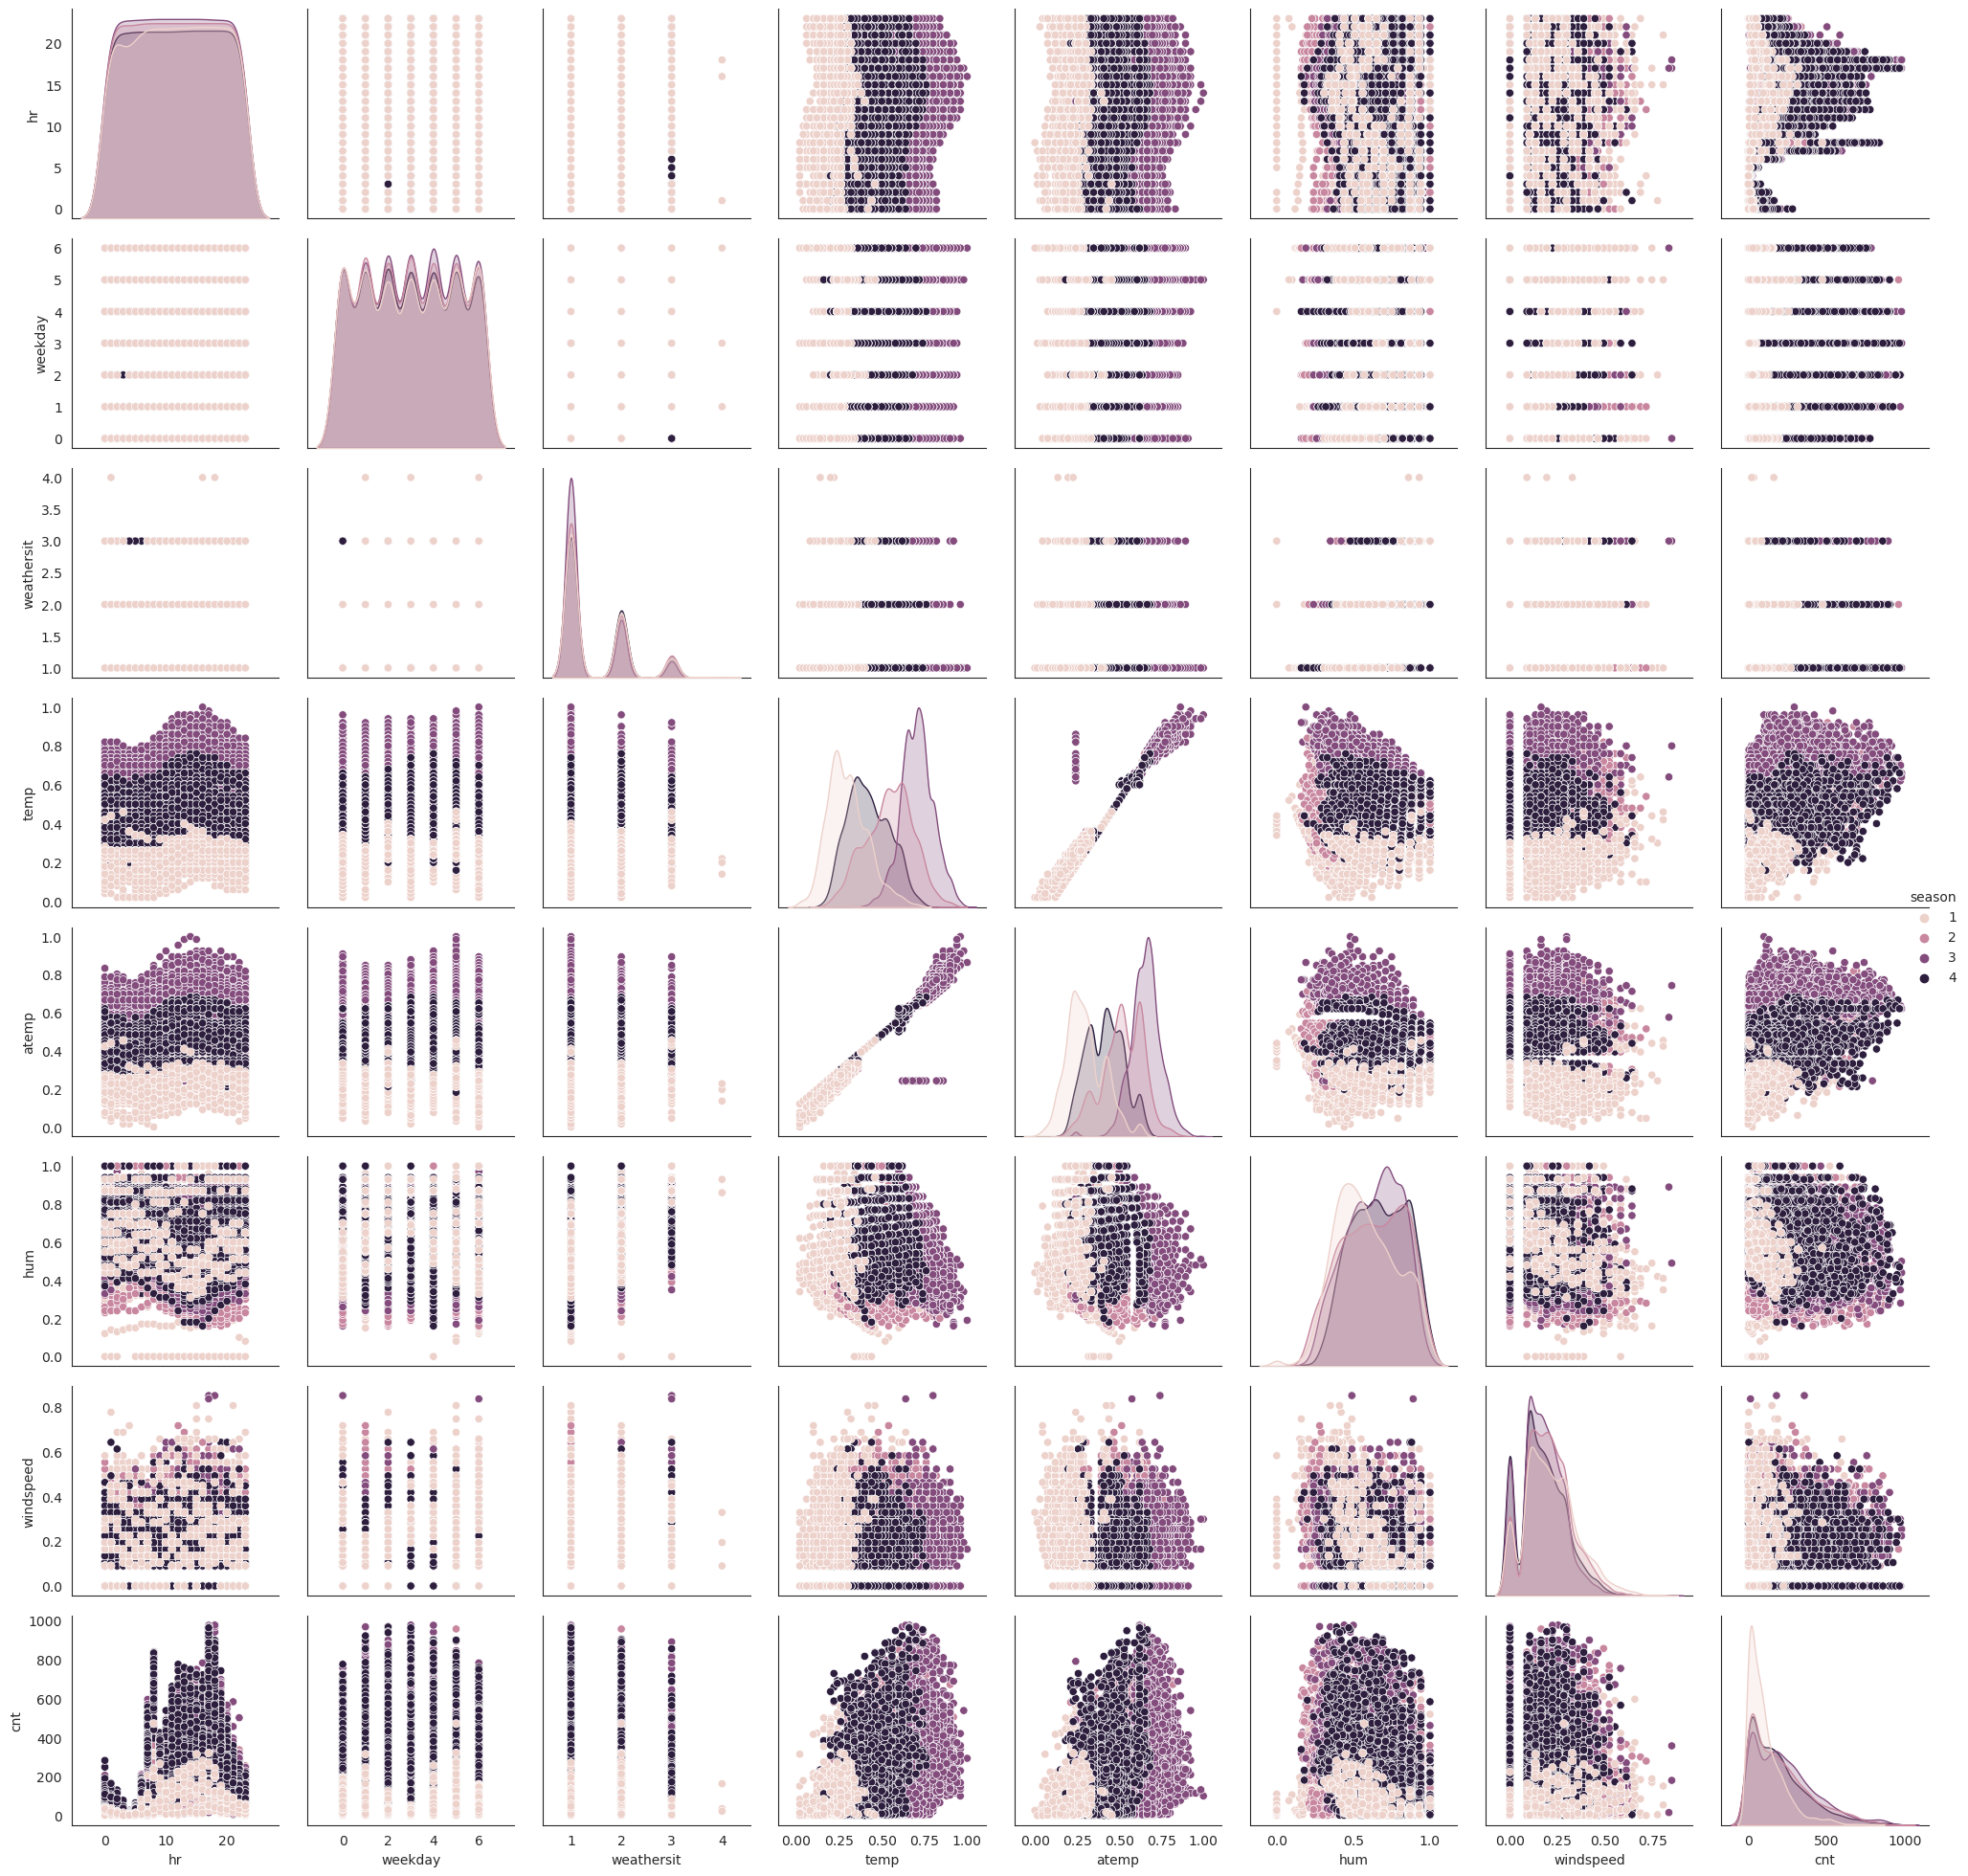

In [22]:
sns.pairplot(df2, hue='season')

In [23]:
df2['season'].value_counts()

3    4496
2    4409
1    4242
4    4232
Name: season, dtype: int64

--- 

This cell goes to the very bottom of your submitted notebok.
You are requried to link the sources and web-links that you have used for various parts of this coursework. 

Write them sources used in the following format similar to the first examle in the sources list below :

    - what you have used them for : web-link

Sources:

- Implement a recurrent neural network : https://peterroelants.github.io/posts/rnn-implementation-part01/
